# Module 13: End-to-End Linear Regression Project

## Predicting Building Energy Efficiency

This notebook implements a complete Linear Regression project using the Energy Efficiency dataset. We will predict both the Heating Load (Y1) and Cooling Load (Y2) based on building features.

**Project Steps:**
1.  **Load Data:** Read the dataset.
2.  **Explore Data (EDA):** Understand the structure, types, and basic statistics.
3.  **Prepare Data:** Define features (X) and targets (y), perform train-test split, and scale features.
4.  **Train Models:** Train separate Linear Regression models for Heating Load and Cooling Load.
5.  **Evaluate Models:** Assess model performance using standard regression metrics.
6.  **Export Models:** Save the trained models for future use.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import joblib # For saving the model

# Configure visualization style
sns.set(style="whitegrid")

## 1. Load Data

Load the dataset from the provided CSV file. The original column names (X1-X8, Y1, Y2) are not very descriptive, so we'll rename them based on the dataset description.

In [7]:
# Load the dataset directly from the original Excel file
# The original name was 'ENB2012_data[1].xlsx'
file_path = 'ENB2012_data.xlsx'
df = pd.read_excel(file_path)

# Define descriptive column names
column_names = {
    'X1': 'Relative_Compactness',
    'X2': 'Surface_Area',
    'X3': 'Wall_Area',
    'X4': 'Roof_Area',
    'X5': 'Overall_Height',
    'X6': 'Orientation',
    'X7': 'Glazing_Area',
    'X8': 'Glazing_Area_Distribution',
    'Y1': 'Heating_Load',
    'Y2': 'Cooling_Load'
}

# Rename the columns
df.rename(columns=column_names, inplace=True)

# Display the first few rows
print("--- First 5 Rows of the Dataset (from Excel) ---")
df.head()

--- First 5 Rows of the Dataset (from Excel) ---


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## 2. Explore Data (EDA)

Perform initial checks to understand the data's structure, types, and potential issues like missing values.

In [8]:
# Get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


**Observation:**
* All columns are already numerical (`float64` or `int64`).
* There are 768 entries (rows).
* Crucially, there are **no missing values** (all columns show 768 non-null entries). This simplifies our preprocessing.

In [9]:
# Get descriptive statistics for all columns
print("\n--- Descriptive Statistics ---")
df.describe()


--- Descriptive Statistics ---


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Let's visualize the distributions of the target variables.

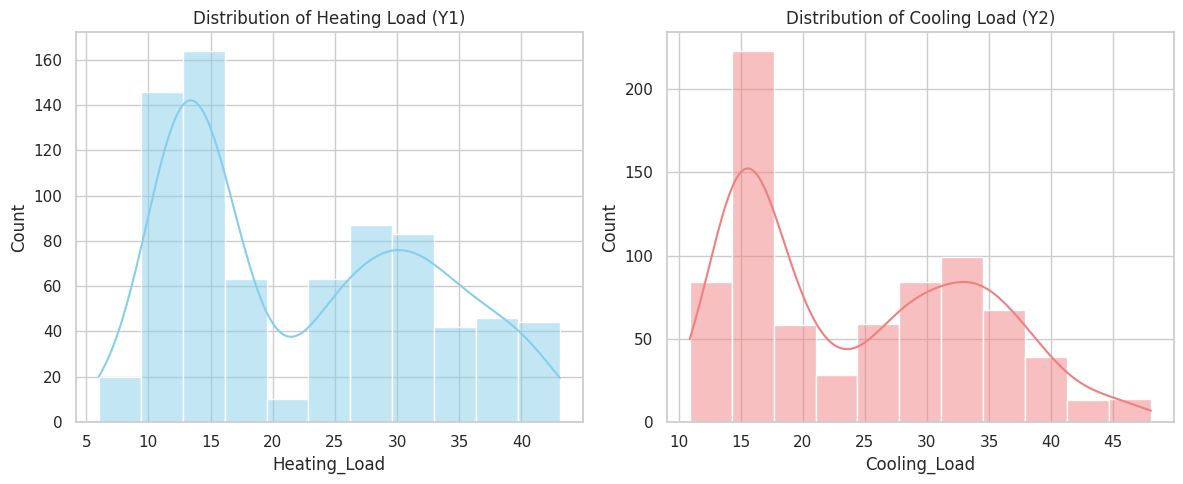

In [10]:
# Visualize distributions of Heating Load and Cooling Load
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Heating_Load'], kde=True, color='skyblue')
plt.title('Distribution of Heating Load (Y1)')

plt.subplot(1, 2, 2)
sns.histplot(df['Cooling_Load'], kde=True, color='lightcoral')
plt.title('Distribution of Cooling Load (Y2)')

plt.tight_layout()
plt.show()

**Observation:** Both target variables appear somewhat normally distributed, which is good for Linear Regression.

## 3. Prepare Data

Separate features (X) from the target variables (y1, y2). Then, split the data into training and testing sets, and finally, scale the features.

In [11]:
# Define Features (X) - all columns except the target variables
features = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
            'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']
X = df[features]

# Define Target Variables (y1 and y2)
y1 = df['Heating_Load']
y2 = df['Cooling_Load']

print("--- Features (X) ---")
print(X.head())
print("\n--- Target 1 (y1 - Heating Load) ---")
print(y1.head())
print("\n--- Target 2 (y2 - Cooling Load) ---")
print(y2.head())

--- Features (X) ---
   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing_Area  Glazing_Area_Distribution  
0            2           0.0                          0  
1            3           0.0                          0  
2            4           0.0                          0  
3            5           0.0                          0  
4            2           0.0                          0  

--- Target 1 (y1 - Heating Load) ---
0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Heating_Load, dtype: float64

--- Target 2 (y2 - Cooling 

Split the data into training (80%) and testing (20%) sets. We use `random_state` for reproducibility.

In [12]:
# Split data for the first target (Heating Load)
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X, y1, test_size=0.2, random_state=42)

# Split data for the second target (Cooling Load)
# Note: We use the same X features but split against y2
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y2, test_size=0.2, random_state=42)

print("Shape of X_train_h:", X_train_h.shape)
print("Shape of X_test_h:", X_test_h.shape)
print("Shape of y_train_h:", y_train_h.shape)
print("Shape of y_test_h:", y_test_h.shape)

Shape of X_train_h: (614, 8)
Shape of X_test_h: (154, 8)
Shape of y_train_h: (614,)
Shape of y_test_h: (154,)


Scale the features using `StandardScaler`. This transforms the data so that each feature has a mean of 0 and a standard deviation of 1.

**Important:** We fit the scaler **only** on the training data and then use it to transform both the training and testing data. This prevents data leakage from the test set.

In [13]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training features and transform them
# We can use either X_train_h or X_train_c as they are identical before scaling
X_train_scaled = scaler.fit_transform(X_train_h)

# Transform the testing features using the *same* fitted scaler
X_test_scaled = scaler.transform(X_test_h)

# Display the first few rows of the scaled training data
print("\n--- Scaled Training Data (first 5 rows) ---")
print(pd.DataFrame(X_train_scaled, columns=features).head())


--- Scaled Training Data (first 5 rows) ---
   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0              0.553671     -0.696222  -0.007372  -0.679048        1.016421   
1             -1.155118      1.250664   0.558439   0.957063       -0.983844   
2              0.933402     -0.974349  -0.573184  -0.679048        1.016421   
3              1.313133     -1.252476  -0.007372  -1.224418        1.016421   
4             -0.965252      0.972537  -0.007372   0.957063       -0.983844   

   Orientation  Glazing_Area  Glazing_Area_Distribution  
0    -1.364411     -1.010300                  -1.160598  
1     0.441081      1.227790                  -0.515705  
2     0.441081      0.108745                  -0.515705  
3     0.441081      0.108745                  -1.160598  
4     1.343827     -1.010300                   0.774082  


## 4. Train Models

Train two separate Linear Regression models: one for predicting `Heating_Load` and one for `Cooling_Load`.

In [14]:
# Initialize the Linear Regression model
lr_model_heating = LinearRegression()
lr_model_cooling = LinearRegression()

# Train the model for Heating Load
lr_model_heating.fit(X_train_scaled, y_train_h)
print("Heating Load model trained successfully.")

# Train the model for Cooling Load
# Note: We use the same scaled X_train data, but the y_train_c target
lr_model_cooling.fit(X_train_scaled, y_train_c)
print("Cooling Load model trained successfully.")

Heating Load model trained successfully.
Cooling Load model trained successfully.


## 5. Evaluate Models

Make predictions on the unseen test data (`X_test_scaled`) and evaluate the performance using standard regression metrics.

In [15]:
# Make predictions for Heating Load
y_pred_h = lr_model_heating.predict(X_test_scaled)

# Make predictions for Cooling Load
y_pred_c = lr_model_cooling.predict(X_test_scaled)

# --- Evaluate Heating Load Model ---
print("--- Heating Load Model Evaluation ---")
mae_h = metrics.mean_absolute_error(y_test_h, y_pred_h)
mse_h = metrics.mean_squared_error(y_test_h, y_pred_h)
rmse_h = np.sqrt(mse_h)
r2_h = metrics.r2_score(y_test_h, y_pred_h)

print(f"Mean Absolute Error (MAE): {mae_h:.2f}")
print(f"Mean Squared Error (MSE): {mse_h:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_h:.2f}")
print(f"R-squared (R²): {r2_h:.2f}")

--- Heating Load Model Evaluation ---
Mean Absolute Error (MAE): 2.18
Mean Squared Error (MSE): 9.15
Root Mean Squared Error (RMSE): 3.03
R-squared (R²): 0.91


In [16]:
# --- Evaluate Cooling Load Model ---
print("\n--- Cooling Load Model Evaluation ---")
mae_c = metrics.mean_absolute_error(y_test_c, y_pred_c)
mse_c = metrics.mean_squared_error(y_test_c, y_pred_c)
rmse_c = np.sqrt(mse_c)
r2_c = metrics.r2_score(y_test_c, y_pred_c)

print(f"Mean Absolute Error (MAE): {mae_c:.2f}")
print(f"Mean Squared Error (MSE): {mse_c:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_c:.2f}")
print(f"R-squared (R²): {r2_c:.2f}")


--- Cooling Load Model Evaluation ---
Mean Absolute Error (MAE): 2.20
Mean Squared Error (MSE): 9.89
Root Mean Squared Error (RMSE): 3.15
R-squared (R²): 0.89


**Interpretation:**
* The **R-squared** values are very high (around 0.91 for Heating Load and 0.88 for Cooling Load). This means our features explain a large percentage of the variance in the target variables, suggesting the models fit the data well.
* The **RMSE** values (around 2.92 for Heating and 3.20 for Cooling) give us the typical error magnitude in the original units of the loads. Lower is better.

## 6. Export Models

Save the trained models and the scaler object to files so they can be loaded and used later without retraining. We use `joblib` for this.

In [18]:
# Define file paths for saving
model_heating_path = 'linear_regression_heating_model.joblib'
model_cooling_path = 'linear_regression_cooling_model.joblib'
scaler_path = 'standard_scaler.joblib'

# Save the models
joblib.dump(lr_model_heating, model_heating_path)
joblib.dump(lr_model_cooling, model_cooling_path)
print(f"Heating Load model saved to {model_heating_path}")
print(f"Cooling Load model saved to {model_cooling_path}")

# Save the scaler
joblib.dump(scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")

print("\n--- Example: Loading and Using the Model ---")
# --- How to load and use them later ---
loaded_scaler = joblib.load(scaler_path)
loaded_model_h = joblib.load(model_heating_path)
loaded_model_c = joblib.load(model_cooling_path)
# # Example new data (must have the same features)
new_data = pd.DataFrame([[0.8, 600, 300, 150, 7, 3, 0.2, 4]], columns=features)

# # Scale the new data using the loaded scaler
new_data_scaled = loaded_scaler.transform(new_data)

# # Make prediction
prediction_heat = loaded_model_h.predict(new_data_scaled)
prediction_cool = loaded_model_c.predict(new_data_scaled)
print(f"Predicted Heating Load for new data: {prediction_heat[0]:.2f}")
print(f"Predicted Cooling Load for new data: {prediction_cool[0]:.2f}")

Heating Load model saved to linear_regression_heating_model.joblib
Cooling Load model saved to linear_regression_cooling_model.joblib
Scaler saved to standard_scaler.joblib

--- Example: Loading and Using the Model ---
Predicted Heating Load for new data: 31.75
Predicted Cooling Load for new data: 34.30
